In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import bench
import display

from string import digits
from os import listdir
from os.path import isfile, join, getsize



onlyfiles = [f for f in listdir('out/') if isfile(join('out/', f))]
app_grid = [f for f in onlyfiles if re.search('app_grid',f)]
cs_grid = [f for f in onlyfiles if re.search('cs_grid',f)]

In [48]:
cs = bench.ContentStore([f'out/{i}' for i in cs_grid])

def split_cache(x):
    if "lru" in x:
        return "lru"
    elif "lfu" in x:
        return "lfu"
    elif "random" in x:
        return "random"
    
def split_capacity(x):
    if "2000" in x:
        return "2000"
    
cs.data_["cache"] = cs.data_["source"].apply((lambda x: split_cache(x)))
cs.data_["cache_capacity"] = cs.data_["source"].apply((lambda x: split_capacity(x)))

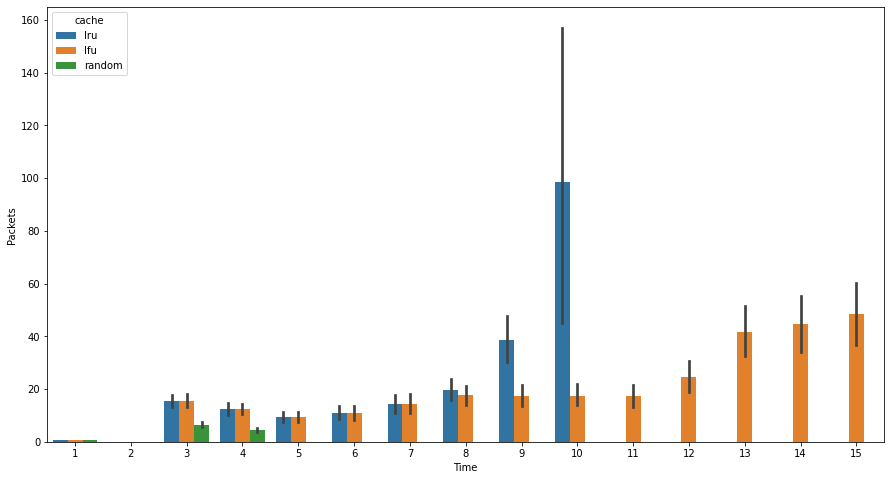

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Time", y = "Packets", hue = "cache", data = cs.data_)
plt.show()

In [55]:
delay = bench.AppDelay([f'out/{i}' for i in app_grid])
delay.data_["cache"] = delay.data_["source"].apply((lambda x: split_cache(x)))
delay.data_["cache_capacity"] = delay.data_["source"].apply((lambda x: split_capacity(x)))
delay.data_

,Time,Node,AppId,SeqNo,Type,DelayS,DelayUS,RetxCount,HopCount,source,NodeType,cache,cache_capacity
0,2.05340,csm1,0.0,5.0,Last,0.003397,3396.58,1.0,1.0,app_grid_3layers_lfu_2000.txt,csm,lfu,2000
1,2.05340,csm1,0.0,5.0,Full,0.003397,3396.58,1.0,1.0,app_grid_3layers_lfu_2000.txt,csm,lfu,2000
2,2.15167,csm1,0.0,15.0,Last,0.001672,1671.56,1.0,1.0,app_grid_3layers_lfu_2000.txt,csm,lfu,2000
3,2.15167,csm1,0.0,15.0,Full,0.001672,1671.56,1.0,1.0,app_grid_3layers_lfu_2000.txt,csm,lfu,2000
4,2.55205,csm1,0.0,50.0,Last,0.002046,2045.95,1.0,1.0,app_grid_3layers_lfu_2000.txt,csm,lfu,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,10.69630,csm6,0.0,139.0,Last,1.046310,1046310.00,1.0,1.0,app_grid_3layers_lru_2000.txt,csm,lru,2000
979,10.69630,csm6,0.0,139.0,Full,1.046310,1046310.00,1.0,1.0,app_grid_3layers_lru_2000.txt,csm,lru,2000
980,10.69630,csm7,0.0,139.0,Last,0.416309,416309.00,1.0,1.0,app_grid_3layers_lru_2000.txt,csm,lru,2000
981,10.69630,csm7,0.0,139.0,Full,0.416309,416309.00,1.0,1.0,app_grid_3layers_lru_2000.txt,csm,lru,2000


<ipython-input-77-af294a400ab3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_delay["Interval"] = mean_delay["Time"] // 1
<ipython-input-77-af294a400ab3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_delay["Interval"] = mean_delay["Time"] // 1


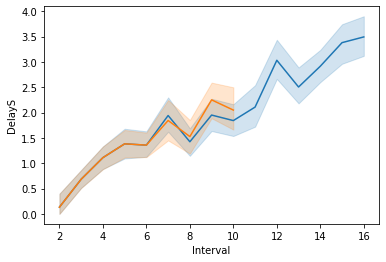

In [77]:
# plt.figure(figsize=(15,8))
# sns.lineplot(x = "Time", y = "DelayS", hue = "cache", 
#              data = delay.data_[(delay.data_["Type"] == "Full") & (delay.data_["cache"] == "lfu")])
# plt.show()

for cache in ["lfu","lru","fifo"]:
    mean_delay = delay.data_[(delay.data_['Type']=='Full') & (delay.data_["cache"] == cache)]
    mean_delay["Interval"] = mean_delay["Time"] // 1

    sns.lineplot(x = "Interval", y = "DelayS", data = mean_delay)

plt.show()